A. IMPORT DATASET

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


In [3]:
import pandas as pd

In [48]:
!pip install --upgrade ipykernel

In [637]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/seagate/hasil_klasifikasi_seagate.csv')
df.head(5)

,rating,comment2,label,Predict
0,5,terimakasih barang sudah terima sesui pesan,positif,positif
1,5,jalan lancar,positif,positif
2,5,moga tidak kendala,positif,positif
3,5,barang mantapss,positif,positif
4,4,tidak kaos free,positif,positif


In [646]:
data = df[df['Predict'] == 'positif']
data

,rating,comment2,label,Predict
0,5,terimakasih barang sudah terima sesui pesan,positif,positif
1,5,jalan lancar,positif,positif
2,5,moga tidak kendala,positif,positif
3,5,barang mantapss,positif,positif
4,4,tidak kaos free,positif,positif
...,...,...,...,...
179,5,beli puas bnget mkasi kakak,positif,positif
180,5,kirim cepat barangsesuai mksi,positif,positif
181,5,mantap barang pakai,positif,positif
182,5,produk original harga respon jual kualitas cep...,positif,positif


In [647]:
df_no_duplicates = data.drop_duplicates()
df_no_duplicates

,rating,comment2,label,Predict
0,5,terimakasih barang sudah terima sesui pesan,positif,positif
1,5,jalan lancar,positif,positif
2,5,moga tidak kendala,positif,positif
3,5,barang mantapss,positif,positif
4,4,tidak kaos free,positif,positif
...,...,...,...,...
179,5,beli puas bnget mkasi kakak,positif,positif
180,5,kirim cepat barangsesuai mksi,positif,positif
181,5,mantap barang pakai,positif,positif
182,5,produk original harga respon jual kualitas cep...,positif,positif


In [648]:
df_no_duplicates.to_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/seagate/positif/hasil_positif_seagate.csv', index=False)

In [681]:
df2 = pd.read_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/seagate/positif/hasil_positif_seagate.csv')
df2.head(5)

,rating,comment2,label,Predict
0,5,terimakasih barang sudah terima sesui pesan,positif,positif
1,5,jalan lancar,positif,positif
2,5,moga tidak kendala,positif,positif
3,5,barang mantapss,positif,positif
4,4,tidak kaos free,positif,positif


B. TOKENIZING WITH GENSIM

In [682]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))
        # deacc=True removes punctuations

In [683]:
word_tokens = df2['comment2'].values.tolist()
data_tokens = list(sent_to_words(word_tokens))

data_tokens[0:3]

[['terimakasih', 'barang', 'sudah', 'terima', 'sesui', 'pesan'],
 ['jalan', 'lancar'],
 ['moga', 'tidak', 'kendala']]

C. DICTIONARY AND CORPUS

Bigram menggabungkan dua kata yang muncul berdampingan menjadi satu unit. Fungsi bigram dalam LDA adalah mempertahankan konteks antara kata-kata yang berdekatan dalam dokumen.

Trigram menggabungkan tiga kata yang muncul berdampingan menjadi satu unit. Fungsi trigram dalam LDA adalah mengidentifikasi hubungan yang lebih kompleks antara kata-kata dalam dokumen.

In [684]:
bigram = gensim.models.Phrases(data_tokens, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_tokens], threshold=100)

In [685]:
for index in range(len(data_tokens)):
  for token in bigram[data_tokens[index]]:
    if '_' in token:
      data_tokens[index].append(token)
  for token in trigram[data_tokens[index]]:
    if '_' in token:
      data_tokens[index].append(token)


In [686]:
from gensim import corpora, models

# create dictionary
dictionary = corpora.Dictionary(data_tokens)

# create corpus
corpus = [dictionary.doc2bow(token) for token in data_tokens]

In [687]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1)], [(8, 1), (9, 1), (10, 1)], [(0, 1), (11, 1)], [(10, 1), (12, 1), (13, 1)], [(9, 1), (14, 1)], [(15, 1), (16, 1), (17, 1)], [(4, 1), (17, 1)], [(18, 1), (19, 1)], [(17, 1), (20, 1), (21, 1), (22, 1)], [(23, 1)], [(4, 1), (17, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(0, 1), (4, 1), (24, 1), (32, 1), (33, 1), (34, 1)], [(35, 1), (36, 1), (37, 1)], [(20, 1), (21, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1)], [(47, 1), (48, 1), (49, 1)], [(1, 1), (3, 1), (6, 1), (8, 1), (17, 1), (23, 1), (43, 1), (45, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1)], [(5, 1), (17, 1), (41, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1)], [(5, 1), (17, 1), (37, 1), (79, 1), (80, 1)], [(5, 1), (1

In [688]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
print(corpus_tfidf[0])

[(0, 0.15063232577383304), (1, 0.3780383480966632), (2, 0.7221335822350485), (3, 0.3669545054741061), (4, 0.22590899034843068), (5, 0.3566924700644735)]


D. COHERENCE SCORE

In [689]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from numpy import array

def get_coherence_values(dictionary, corpus, tokens, num_topics):
  model_list = []
  coherence_values = []
  for i in range(1, num_topics+1):
    model = LdaModel(corpus=corpus, id2word=dictionary,
                     num_topics=i, iterations=100)
    coherence_model = CoherenceModel(model=model, texts=tokens,
                                     dictionary=dictionary, coherence='c_v')
    model_list.append(model)
    coherence_values.append(coherence_model.get_coherence())

  return model_list, coherence_values

In [698]:
num_topics = 15
model_list, coherence_values = get_coherence_values(dictionary, corpus_tfidf,
                                                    data_tokens, num_topics)

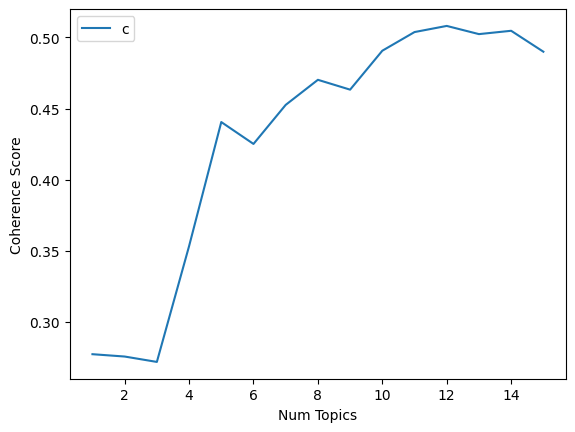

In [699]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_topics+1), coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'), loc='best')
plt.savefig('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/seagate/positif/hasil_positif_cv3.png')
plt.show()

In [700]:
coherence_df = pd.DataFrame(list(zip([i+1 for i in range(num_topics)], coherence_values)),
                            columns=['num_of_topics', 'coherence_values'])
coherence_df

,num_of_topics,coherence_values
0,1,0.277410
1,2,0.275768
2,3,0.271984
3,4,0.353307
4,5,0.440498
5,6,0.425125
6,7,0.452562
7,8,0.470174
8,9,0.463260
9,10,0.490609


In [701]:
coherence_df.to_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/seagate/positif/coherence-value-positif-seagate.csv', index=False)

E. MODEL

In [721]:
# build LDA Model
model = LdaModel(corpus=corpus, num_topics=9, id2word=dictionary)

In [722]:
for index, topic in model.print_topics(-1):
  print('Topic {}:\nWord: {}\n'.format(index+1, topic))

Topic 1:
Word: 0.054*"cepat" + 0.052*"kirim" + 0.032*"terima" + 0.029*"kasih" + 0.026*"barang" + 0.024*"produk" + 0.021*"sesuai" + 0.020*"original" + 0.015*"coba" + 0.013*"bagus"

Topic 2:
Word: 0.036*"barang" + 0.034*"moga" + 0.029*"terima" + 0.026*"cepat" + 0.026*"kirim" + 0.019*"aman" + 0.018*"bagus" + 0.016*"original" + 0.016*"pasang" + 0.016*"awet"

Topic 3:
Word: 0.040*"cepat" + 0.033*"barang" + 0.030*"kirim" + 0.027*"mantap" + 0.020*"coba" + 0.020*"selamat" + 0.018*"terima" + 0.018*"moga" + 0.017*"packing" + 0.017*"terimakasih"

Topic 4:
Word: 0.026*"produk" + 0.026*"pasang" + 0.017*"sudah" + 0.017*"cepat" + 0.017*"kirim" + 0.017*"respon" + 0.017*"terimakasih" + 0.017*"barang" + 0.017*"mantul" + 0.017*"ori"

Topic 5:
Word: 0.033*"barang" + 0.031*"moga" + 0.029*"kirim" + 0.027*"awet" + 0.021*"terima" + 0.019*"seagate" + 0.017*"produk" + 0.017*"cepat" + 0.013*"kasih" + 0.013*"lancar"

Topic 6:
Word: 0.043*"cepat" + 0.037*"produk" + 0.026*"kualitas" + 0.025*"kirim" + 0.025*"awet" +

In [725]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
                                                                  round(prop_topic,4),
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [726]:

df_topic_sents_keywords = format_topics_sentences(ldamodel=model,
                                                  corpus=corpus_tfidf,
                                                  texts=data_tokens)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic',
                             'Topic_Perc_Contrib', 'Keywords', 'Text']

<ipython-input-725-b6c81b803486>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
<ipython-input-725-b6c81b803486>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
<ipython-input-725-b6c81b803486>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
<ipython-input-725-b6c81b803486>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
<ipython-input-725-b6c81b803486>:15: FutureWarni

In [727]:
df_dominant_topic[:10:]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2,0.7222,"cepat, barang, kirim, mantap, coba, selamat, t...","[terimakasih, barang, sudah, terima, sesui, pe..."
1,1,3,0.6306,"produk, pasang, sudah, cepat, kirim, respon, t...","[jalan, lancar]"
2,2,1,0.6651,"barang, moga, terima, cepat, kirim, aman, bagu...","[moga, tidak, kendala]"
3,3,0,0.5927,"cepat, kirim, terima, kasih, barang, produk, s...","[barang, mantapss]"
4,4,0,0.6669,"cepat, kirim, terima, kasih, barang, produk, s...","[tidak, kaos, free]"
5,5,4,0.6300,"barang, moga, kirim, awet, terima, seagate, pr...","[moga, awet]"
6,6,7,0.6728,"bagus, barang, seller, packing, sesuai, produk...","[produk, packing, bagus]"
7,7,0,0.6316,"cepat, kirim, terima, kasih, barang, produk, s...","[produk, terima]"
8,8,6,0.6282,"barang, kualitas, moga, mantap, kasih, terima,...","[good, sangt]"
9,9,5,0.7000,"cepat, produk, kualitas, kirim, awet, original...","[kirim, cepat, produk, original]"


In [728]:
df_dominant_topic.to_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/seagate/positif/dominant_topic_positif_seagate.csv', index=False)

In [729]:
# Word Count of Topic Keywords

from collections import Counter
topics = model.show_topics(formatted=False)
data_flat = [w for w_list in data_tokens for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount)

        word  topic_id  importance  word_count
0      cepat         0    0.053894          58
1      kirim         0    0.051711          54
2     terima         0    0.031732          39
3      kasih         0    0.028501          29
4     barang         0    0.026259          62
..       ...       ...         ...         ...
85  original         8    0.013913          30
86    produk         8    0.013913          34
87     cepat         8    0.013913          58
88    respon         8    0.013912          20
89      emas         8    0.013912          10

[90 rows x 4 columns]


In [730]:
df_imp = pd.DataFrame(df_imp_wcount)
df_imp

,word,topic_id,importance,word_count
0,cepat,0,0.053894,58
1,kirim,0,0.051711,54
2,terima,0,0.031732,39
3,kasih,0,0.028501,29
4,barang,0,0.026259,62
...,...,...,...,...
85,original,8,0.013913,30
86,produk,8,0.013913,34
87,cepat,8,0.013913,58
88,respon,8,0.013912,20


In [731]:
df_imp.to_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/seagate/positif/wordcount_topic_positif_seagate.csv', index=False)

F. pyLDAvis

In [ ]:
!pip install pyLDAvis

In [ ]:
!pip install pandas==1.5.3

In [723]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, '/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/seagate/positif/lda-positif-seagate.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.090103 -0.021131       1        1  16.533980
0      0.052479 -0.063263       2        1  16.357074
2      0.007699 -0.099774       3        1  14.282168
6     -0.026802 -0.024104       4        1  11.213473
4     -0.097420  0.039375       5        1  10.884992
5      0.013692  0.025355       6        1  10.157412
7      0.019330  0.086427       7        1   7.677490
8      0.066119  0.019313       8        1   6.588139
3      0.055006  0.037802       9        1   6.305272, topic_info=          Term      Freq     Total Category  logprob  loglift
61    kualitas  5.000000  5.000000  Default  30.0000  30.0000
92      mantap  4.000000  4.000000  Default  29.0000  29.0000
29      seller  3.000000  3.000000  Default  28.0000  28.0000
15       bagus  6.000000  6.000000  Default  27.0000  27.0000
129     pasang  3.000000  3.000000  Default  26.0000 

In [724]:
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.090103 -0.021131       1        1  16.533980
0      0.052479 -0.063263       2        1  16.357074
2      0.007699 -0.099774       3        1  14.282168
6     -0.026802 -0.024104       4        1  11.213473
4     -0.097420  0.039375       5        1  10.884992
5      0.013692  0.025355       6        1  10.157412
7      0.019330  0.086427       7        1   7.677490
8      0.066119  0.019313       8        1   6.588139
3      0.055006  0.037802       9        1   6.305272, topic_info=          Term      Freq     Total Category  logprob  loglift
61    kualitas  5.000000  5.000000  Default  30.0000  30.0000
92      mantap  4.000000  4.000000  Default  29.0000  29.0000
29      seller  3.000000  3.000000  Default  28.0000  28.0000
15       bagus  6.000000  6.000000  Default  27.0000  27.0000
129     pasang  3.000000  3.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
43       pakai  0.272126  4.070244   Topic9  -4.6878   0.0586
95        jual  0.272104  3.402593   Topic9  -4.6879   0.2377
77       harga  0.272098  2.746600   Topic9  -4.6879   0.4518
110     laptop  0.272087  2.600067   Topic9  -4.6880   0.5066
79   deskripsi  0.272082  1.614866   Topic9  -4.6880   0.9829

[551 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
24        1  0.191407     aman
24        2  0.191407     aman
24        3  0.191407     aman
24        4  0.191407     aman
24        5  0.191407     aman
...     ...       ...      ...
10        1  0.327081    tidak
10        2  0.327081    tidak
10        8  0.327081    tidak
128       7  1.344581  tingkat
73        1  0.589321    untuk

[152 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 7, 5, 6, 8, 9, 4])

G. WORCLOUD TOPIC

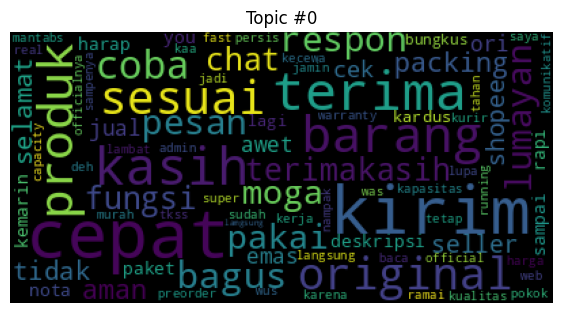

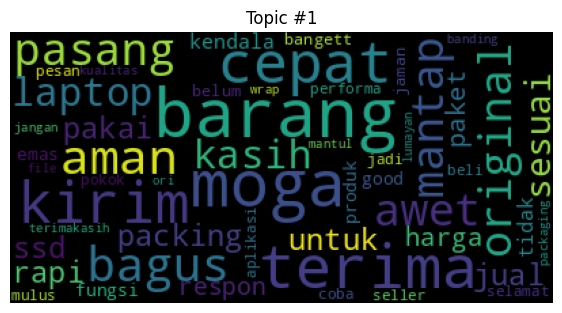

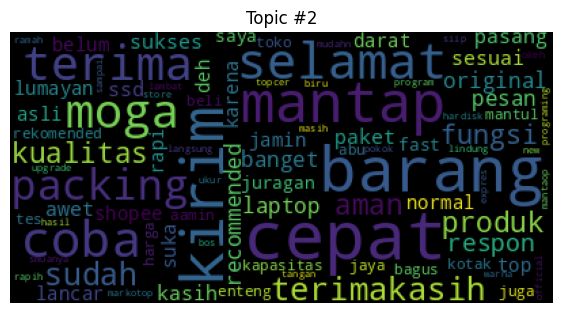

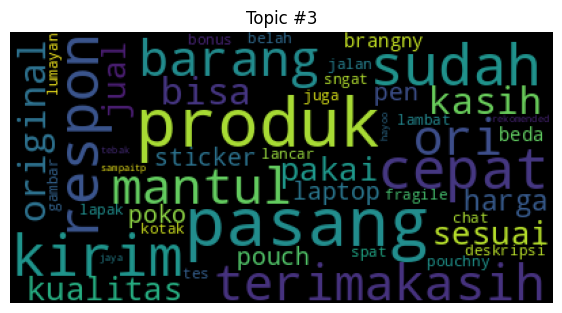

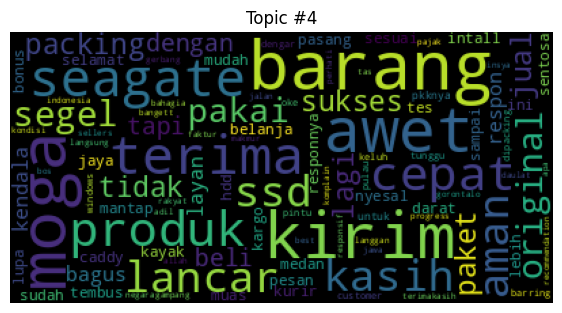

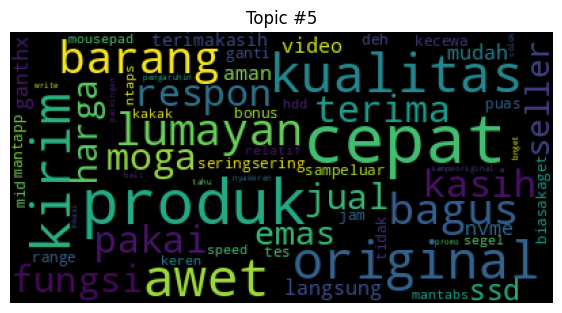

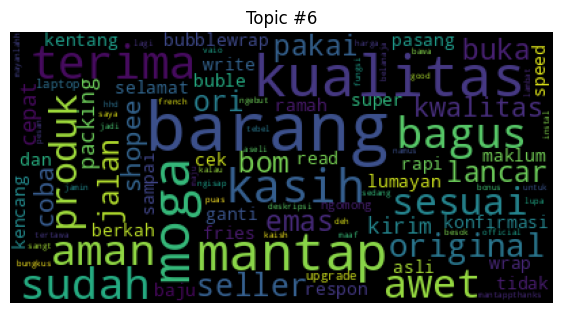

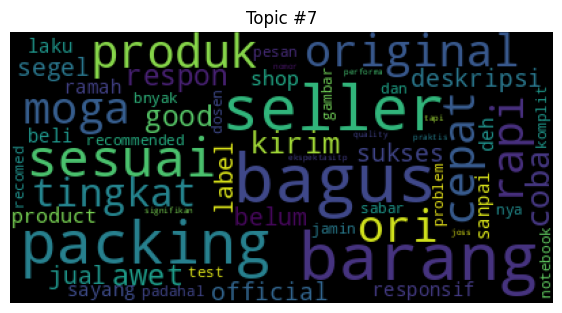

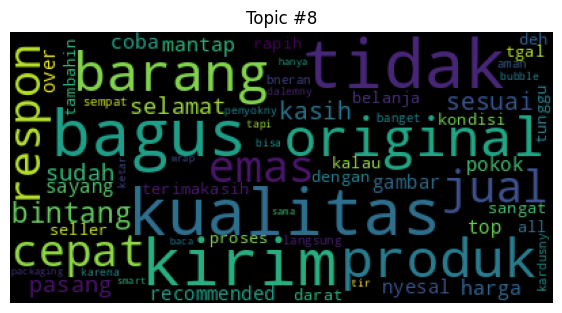

In [732]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, min_font_size=6).fit_words(dict(model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/seagate/positif/wcld-topic-positif-seagate-#"+str(t)+".png", facecolor='k', bbox_inches='tight')

plt.show()